Observations and Insights 

The Campomulin and Ramicane drug regiments had the highest mice numbers treated, 203 mice on Campomulin and 120 on Ramicane. 
There is also a positive correlation between average volume of tumors and weight of given mouse. The correlation is 0.84. 
There is almost an equal distribution of female vs male among four drug regiments. 52.2% .2male and 49.8% female.
This could leads to further findings on how these four drug regiments could possibly work by gender factor. 


In [262]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_table = pd.merge(mouse_metadata, study_results, how='outer')
# Display the data table for preview
combined_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [225]:
# Checking the number of mice.

mice_count= combined_table["Mouse ID"].value_counts()
mice_count= len(mice_count)
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_table[combined_table.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
total_duplicate_mice = combined_table[combined_table.duplicated(["Mouse ID", "Timepoint"])]
total_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_table.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df = combined_table[combined_table['Mouse ID'].isin(duplicate_mice)==False]


## Summary Statistics

In [269]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stat = clean_df.groupby('Drug Regimen')
first = summary_stat.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
first


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_stat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

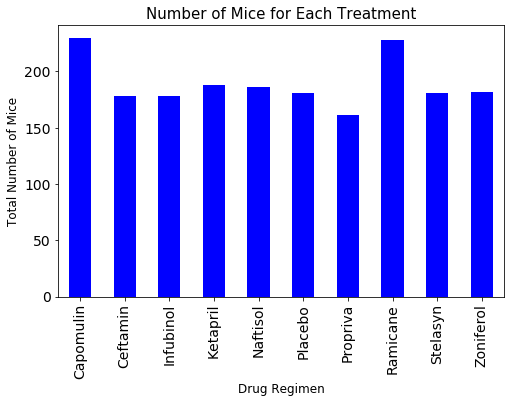

In [271]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_treatment = combined_table.groupby(["Drug Regimen"]).count()["Mouse ID"]
plot_pandas = pd.DataFrame(mice_per_treatment)

plot_pandas = mice_per_treatment.plot.bar(figsize=(8,5), color='b',fontsize = 14)
mice_per_treatment

plt.xlabel("Drug Regimen",fontsize = 12),plt.ylabel("Total Number of Mice",fontsize = 12),plt.title("Number of Mice for Each Treatment",fontsize = 15)
plt.savefig('bar_plot1')
plt.show()


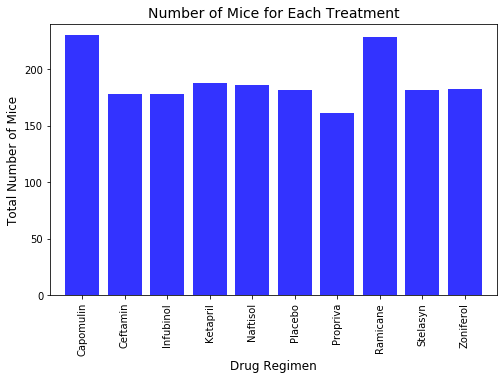

In [272]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_per_treatment =(combined_table.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_per_treatment))

fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.bar(x_axis, mice_per_treatment, color='b', alpha=0.8, align='center')

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_per_treatment)+10)

plt.title("Number of Mice for Each Treatment",fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Total Number of Mice",fontsize = 12)
plt.savefig('bar_plot2')
plt.show()


In [240]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = mouse_metadata.groupby("Sex").count()

gender_df


,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


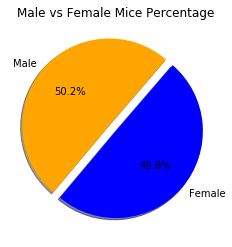

In [267]:
numbers=[125,124]
labels=["Male","Female"]
colors=["blue","orange"]
explode=(0.1,0)

gender_pie_plot=gender_df.plot.pie(y="Mouse ID",explode=(0,0.1),legend=False,autopct = "%.1f%%",
                                               startangle=230,colors=["blue","orange"],labels=["Female","Male"],shadow=True)
gender_pie_plot.axes.get_yaxis().set_visible(False)
gender_pie_plot.set_title("Male vs Female Mice Percentage");
plt.savefig('pit_chart')

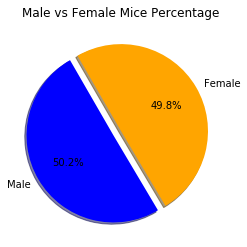

In [244]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(numbers,explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=120);
plt.title("Male vs Female Mice Percentage");


## Quartiles, Outliers and Boxplots

In [247]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset     
# Determine outliers using upper and lower bounds
    
capomulin_df = combined_table.loc[combined_table["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_table.loc[combined_table["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_table.loc[combined_table["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_table.loc[combined_table["Drug Regimen"] == "Ceftamin", :]
capomulin_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [248]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_greatest_tim = capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_last_tim = pd.DataFrame(cap_greatest_tim)
cap_last_tim_pd = pd.merge(cap_last_tim,combined_table, on=("Mouse ID","Timepoint"),how="left")
cap_last_tim_pd.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [257]:
capomulin_tm = cap_last_tim_pd["Tumor Volume (mm3)"]

quartiles =capomulin_tm.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")


Values below 20.70456164999999 could be potential outliers.
Values above 51.83201549 could be potential outliers.


In [252]:

ram_greatest_tim = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_last_tim = pd.DataFrame(ram_greatest_tim)
ram_last_tim_pd = pd.merge(ram_last_tim,combined_table, on=("Mouse ID","Timepoint"),how="left")
ram_last_tim_pd.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [258]:
ramicane_tm = ram_last_tim_pd["Tumor Volume (mm3)"]

quartiles = ramicane_tm.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")


Values below 17.912664470000003 could be potential outliers.
Values above 54.30681135 could be potential outliers.


In [255]:
inf_greatest_tim = infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_last_tim = pd.DataFrame(inf_greatest_tim)
inf_last_tim_pd = pd.merge(inf_last_tim,combined_table, on=("Mouse ID","Timepoint"),how="left")
inf_last_tim_pd.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [259]:
infubinol_tm = inf_last_tim_pd["Tumor Volume (mm3)"]

quartiles = infubinol_tm.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")


Values below 36.83290494999999 could be potential outliers.
Values above 82.74144559000001 could be potential outliers.


In [190]:
cef_greatest_tim = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
cef_last_tim = pd.DataFrame(cef_greatest_tim)
cef_last_tim_pd = pd.merge(cef_last_tim,combined_table, on=("Mouse ID","Timepoint"),how="left")
cef_last_tim_pd.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [261]:
ceftamin_tm = cef_last_tim_pd["Tumor Volume (mm3)"]

quartiles = ceftamin_tm.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")


Values below 25.355449580000002 could be potential outliers.
Values above 87.66645829999999 could be potential outliers.


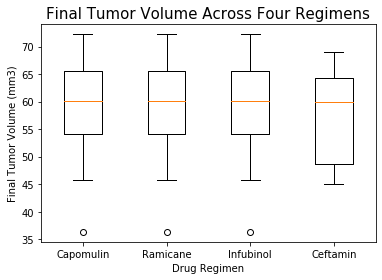

In [226]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [capomulin_tm, ramicane_tm, infubinol_tm, ceftamin_tm]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Regimens', fontsize = 15)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()



## Line and Scatter Plots

In [197]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "g316",:]
line_plot_df.head(3)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0


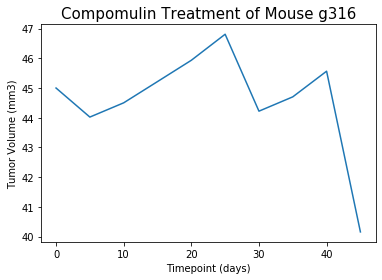

In [201]:
tim_x=line_plot_df["Timepoint"]
tumo_y=line_plot_df["Tumor Volume (mm3)"]

plt.plot(tim_x,tumo_y);
plt.title("Compomulin Treatment of Mouse g316",fontsize = 15)
plt.xlabel("Timepoint (days)",fontsize = 10)
plt.ylabel("Tumor Volume (mm3)",fontsize = 10)

plt.savefig('plotline')
plt.show()



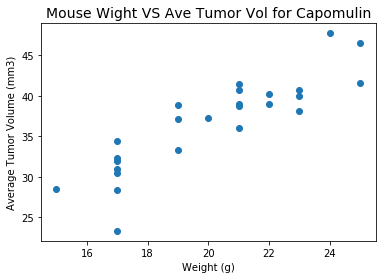

In [208]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_average = cap_last_tim_pd.groupby(["Mouse ID"]).mean()
plt.scatter(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"])
plt.title("Mouse Wight VS Ave Tumor Vol for Capomulin",fontsize = 14)
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig('scatterplot')
plt.show()



## Correlation and Regression

In [221]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"])[0],2)

model=st.linregress(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"])
model

LinregressResult(slope=1.750468228958504, intercept=1.4481469525549002, rvalue=0.8767060403658119, pvalue=9.0844290886732e-09, stderr=0.20026513236453639)

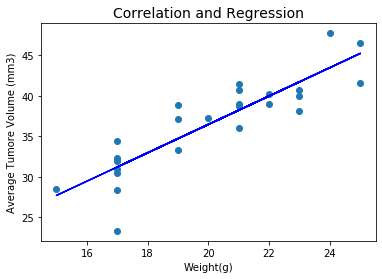

In [265]:
slope = 1.750468228958504
intercept = 1.4481469525549002
y_values = cap_average["Weight (g)"]*slope+intercept
plt.scatter(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"])
plt.plot(cap_average["Weight (g)"],y_values,color="blue")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumore Volume (mm3)")
plt.title("Correlation and Regression",fontsize = 14)

plt.savefig("linearreg for campomulin")
plt.show()
